###### Problem 1:
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance  

Problem 2:
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.  
Problem 3:
Identify which all stocks are moving together and which all stocks are different from
each other.

In [25]:
# import required libraries
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_csv("data_stocks.csv")

In [27]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [28]:
data['DATE'] = pd.to_datetime(data['DATE'], unit='s')

In [29]:
data['DATE'].tail()

41261   2017-08-31 19:56:00
41262   2017-08-31 19:57:00
41263   2017-08-31 19:58:00
41264   2017-08-31 19:59:00
41265   2017-08-31 20:00:00
Name: DATE, dtype: datetime64[ns]

In [30]:
data.index = data['DATE']

In [31]:
data.drop('DATE',axis = 1,inplace=True)

In [32]:
data.tail()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-08-31 19:56:00,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,45.130,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
2017-08-31 19:57:00,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,45.130,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
2017-08-31 19:58:00,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,45.135,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
2017-08-31 19:59:00,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,45.065,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
2017-08-31 20:00:00,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,45.120,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [33]:

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41266 entries, 2017-04-03 13:30:00 to 2017-08-31 20:00:00
Columns: 501 entries, SP500 to NYSE.ZTS
dtypes: float64(501)
memory usage: 158.0 MB


In [34]:
data.columns

Index(['SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE', 'NASDAQ.ADI',
       'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       'NASDAQ.AMAT',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=501)

In [35]:
data.shape


(41266, 501)

In [36]:
from sklearn.preprocessing import StandardScaler
features = data.values
sc = StandardScaler()
X_scaled = sc.fit_transform(features)
print('Shape of Scaled features : ')
print('---------------------------------------------------------------------')
print(X_scaled.shape)

Shape of Scaled features : 
---------------------------------------------------------------------
(41266, 501)


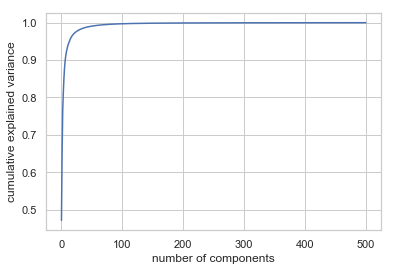

In [38]:
import seaborn as sns
from sklearn.decomposition import PCA
sns.set()
sns.set_style('whitegrid')
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [39]:
#Apply PCA for Dimesion Reduction from 502 to 2 dimensions for better data visualization.

pca = PCA(n_components=2)
pca.fit(X_scaled)
print('explained variance :')
print('-'*70)
print(pca.explained_variance_)
print('-'*70)
print('PCA Components : ')
print('-'*70)
print(pca.components_)
print('-'*70)
X_transformed = pca.transform(X_scaled)
print('Transformed Feature values first five rows :')
print('-'*70)
print(X_transformed[:5,:])
print('-'*70)
print('Transformed Feature shape :')
print('-'*70)
print(X_transformed.shape)
print('-'*70)
print('Original Feature shape :')
print('-'*70)
print(X_scaled.shape)
print('-'*70)
print('Restransformed Feature shape :')
print('-'*70)
X_retransformed = pca.inverse_transform(X_transformed)
print(X_retransformed.shape)
print('-'*70)
print('Retransformed Feature values first five rows :')
print('-'*70)
print(X_retransformed[:5,:])
print('-'*70)

explained variance :
----------------------------------------------------------------------
[236.04058107  86.19123638]
----------------------------------------------------------------------
PCA Components : 
----------------------------------------------------------------------
[[-0.06114701 -0.03924041 -0.04096625 ... -0.06236711  0.00246362
  -0.05163077]
 [-0.01775002 -0.06423325  0.0339453  ... -0.02028463 -0.08125743
  -0.05938866]]
----------------------------------------------------------------------
Transformed Feature values first five rows :
----------------------------------------------------------------------
[[25.59509485  9.9807717 ]
 [25.69257356  9.86717585]
 [25.60957179  9.80054524]
 [25.71231341  9.96900029]
 [25.62346755  9.85263868]]
----------------------------------------------------------------------
Transformed Feature shape :
----------------------------------------------------------------------
(41266, 2)
-----------------------------------------------------

#### Problem 1:
There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

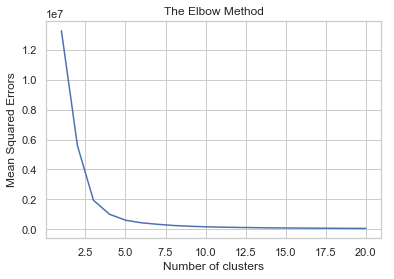

In [40]:
#Finding optimum number of clusters for KMEANS cluster¶
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.show()

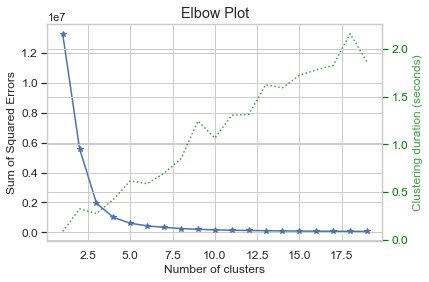

In [52]:

import scikitplot

scikitplot.cluster.plot_elbow_curve(KMeans(),X_transformed,cluster_ranges=range(1,20))

Optimum number of cluster from the elbow method is determined to be 5

Applying K-Means Clustering to find stocks which are similar in performance

In [45]:
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(X_transformed)
y_kmeans = kmeans.fit_predict(X_transformed)
labels = k_means.labels_
print("labels generated :\n",labels)

labels generated :
 [2 2 2 ... 4 4 4]


In [46]:
len(labels)

41266

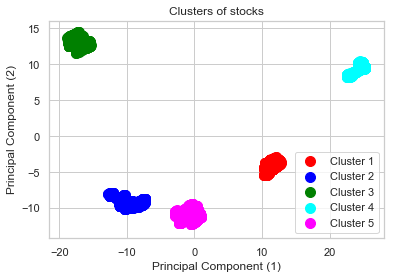

In [47]:
# Visualising the clusters
#below 5 clusters shows the stocks which are similar in stock performance
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

#### Problem 2:
How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [49]:
data1 = data.copy()

In [50]:
data_comp = pd.DataFrame(pca.components_,columns=data1.columns)
data_comp.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.061147,-0.039240,-0.040966,-0.062790,-0.009795,-0.035806,-0.054582,0.050252,-0.035304,-0.044019,...,-0.04937,0.056909,-0.054502,-0.050550,0.047054,-0.057781,-0.061261,-0.062367,0.002464,-0.051631
1,-0.017750,-0.064233,0.033945,0.001972,-0.032422,0.043522,-0.029407,0.016056,0.058312,-0.052582,...,-0.05886,0.030177,0.013762,-0.040697,-0.052898,0.010326,0.031561,-0.020285,-0.081257,-0.059389


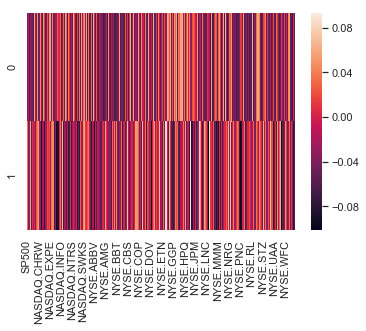

In [51]:
sns.set_style('whitegrid')
sns.heatmap(data_comp)

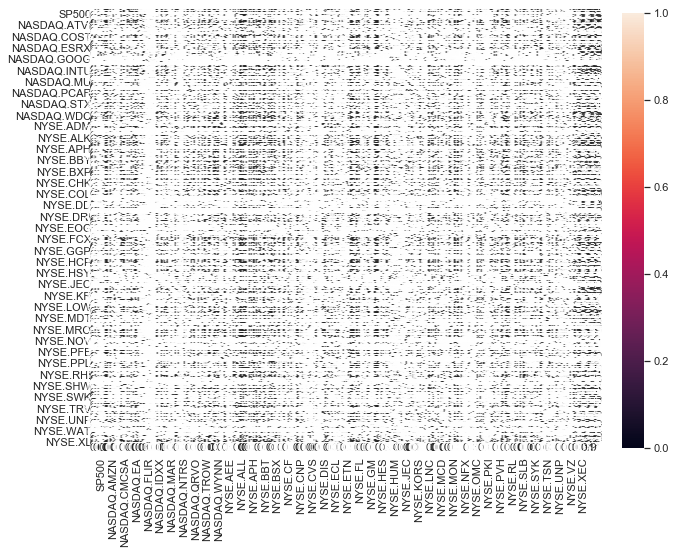

In [54]:
plt.figure(figsize=(11,8))
data_corr = data1.corr().abs()
sns.heatmap(data_corr,annot=True)

##### Problem 3:
Identify which all stocks are moving together and which all stocks are different from each other.

In [55]:

data['labels'] = labels
data.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,labels
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,2
2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2
2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2
2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2
2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2


In [56]:
data['labels'].unique().tolist()

[2, 1, 3, 0, 4]

In [57]:
for i in data['labels'].unique().tolist():
    count = data[data['labels'] == i].shape[0]
    print('\nFor lablel {} the number of similar stock performances is : {} '.format(i,count))


For lablel 2 the number of similar stock performances is : 5872 

For lablel 1 the number of similar stock performances is : 8627 

For lablel 3 the number of similar stock performances is : 11167 

For lablel 0 the number of similar stock performances is : 5862 

For lablel 4 the number of similar stock performances is : 9738 


In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import SpectralClustering
hc = SpectralClustering(n_clusters = 5, affinity = 'nearest_neighbors')
hc.fit(X_transformed)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=5, n_init=10, n_jobs=None,
          n_neighbors=10, random_state=None)

In [63]:
hc.fit_predict(X_transformed)

array([3, 3, 3, ..., 1, 1, 1])

In [64]:
y_labels = hc.labels_

In [65]:

len(y_labels),np.unique(y_labels)

(41266, array([0, 1, 2, 3, 4]))

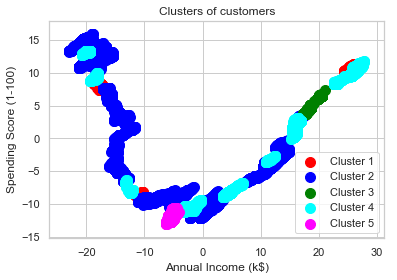

In [66]:
# Visualising the clusters
X = X_transformed
plt.scatter(X[y_labels == 0, 0], X[y_labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_labels == 1, 0], X[y_labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_labels == 2, 0], X[y_labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_labels == 3, 0], X[y_labels == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_labels == 4, 0], X[y_labels == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [67]:
data1.columns

Index(['SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE', 'NASDAQ.ADI',
       'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       'NASDAQ.AMAT',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=501)

In [70]:
data2 = data1.copy()
data2['labels'] = y_labels
for i in data2['labels'].unique().tolist():
    count = data2[data2['labels'] == i].shape[0]
    print('\nFor lablel {} the number of similar stock performances is : {} '.format(i,count))


For lablel 3 the number of similar stock performances is : 10891 

For lablel 0 the number of similar stock performances is : 1998 

For lablel 2 the number of similar stock performances is : 921 

For lablel 1 the number of similar stock performances is : 24905 

For lablel 4 the number of similar stock performances is : 2551 
